# Fit 2
Fitting a 2-D histogram
This tutorial illustrates :
 - how to create a 2-d function
 - fill a 2-d histogram randomly from this function
 - fit the histogram
 - display the fitted function on top of the histogram

This example can be executed via the interpreter or ACLIC

```cpp
  root > .x fit2.C
  root > .x fit2.C++
```




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:27 AM.</small></i>

In [1]:
%%cpp -d
#include "TF2.h"
#include "TH2.h"
#include "TMath.h"

 A helper function is created: 

In [2]:
%%cpp -d
Double_t g2(Double_t *x, Double_t *par) {
   Double_t r1 = Double_t((x[0]-par[1])/par[2]);
   Double_t r2 = Double_t((x[1]-par[3])/par[4]);
   return par[0]*TMath::Exp(-0.5*(r1*r1+r2*r2));
}

 A helper function is created: 

In [3]:
%%cpp -d
Double_t fun2(Double_t *x, Double_t *par) {
   Double_t *p1 = &par[0];
   Double_t *p2 = &par[5];
   Double_t *p3 = &par[10];
   Double_t result = g2(x,p1) + g2(x,p2) + g2(x,p3);
   return result;
}

In [4]:
const Int_t npar = 15;
Double_t f2params[npar] =
   {100,-3,3,-3,3,160,0,0.8,0,0.9,40,4,0.7,4,0.7};
TF2 *f2 = new TF2("f2",fun2,-10,10,-10,10, npar);
f2->SetParameters(f2params);

Create an histogram and fill it randomly with f2

In [5]:
TH2F *h2 = new TH2F("h2","from f2",40,-10,10,40,-10,10);
Int_t nentries = 100000;
h2->FillRandom("f2",nentries);

Fit h2 with original function f2

In [6]:
Float_t ratio = 4*nentries/100000;
f2params[ 0] *= ratio;
f2params[ 5] *= ratio;
f2params[10] *= ratio;
f2->SetParameters(f2params);
h2->Fit("f2");
f2->Draw("cont1 same");

 FCN=1048.29 FROM MIGRAD    STATUS=CONVERGED     384 CALLS         385 TOTAL
                     EDM=1.71323e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.92557e+02   1.80794e+00  -8.93086e-04   1.08685e-04
   2  p1          -2.99839e+00   1.13352e-02  -6.49024e-06  -1.81171e-02
   3  p2           2.98485e+00   7.41044e-03   3.61030e-06  -5.86707e-02
   4  p3          -3.00202e+00   1.11595e-02  -5.78996e-06  -1.75293e-02
   5  p4           2.97271e+00   7.15832e-03  -3.28538e-06  -4.12676e-02
   6  p5           6.01136e+02   9.83774e+00   3.21497e-03  -2.69039e-05
   7  p6           6.14587e-03   1.13579e-02   5.13989e-06   2.41417e-02
   8  p7           8.16263e-01   9.52518e-03   3.01651e-06  -8.27897e-03
   9  p8          -7.76134e-04   1.27854e-02   5.13131e-06  -5.37304e-03
  10  p9           9.11281e-0

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

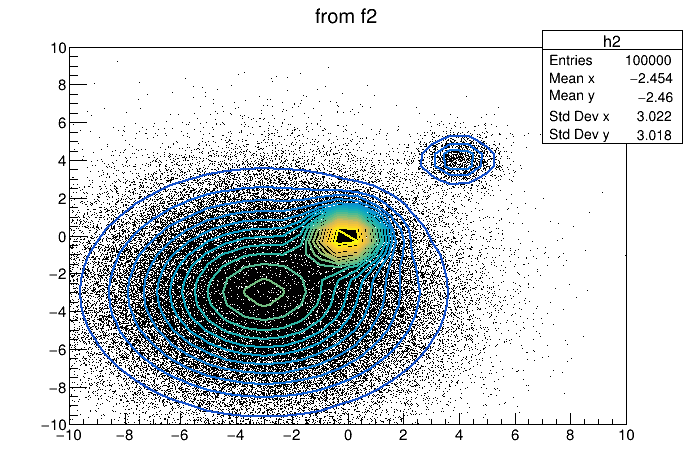

In [7]:
gROOT->GetListOfCanvases()->Draw()